In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller




tapes = pd.read_csv(r'C:\Users\tlext\Desktop\Group Project\UoB_Set01_2025-01-02tapes.csv')
tapes_df = pd.DataFrame(tapes)
tapes_df.columns = ['Time', 'Price', 'Quantity']
tape_price = tapes_df['Price']


def test_stationarity(timeseries):
    print("Results for dickey fuller test")
    results = adfuller(timeseries, autolag='AIC')
    output = pd.Series(results[0:4],
                       index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in results[4].items():
        output['critical value (%s)' % key] = values
    print(output)


test_stationarity(tape_price)







Results for dickey fuller test
Test Statistics                   -3.359978
p-value                            0.012401
No. of lags used                  48.000000
Number of observations used    23761.000000
critical value (1%)               -3.430625
critical value (5%)               -2.861662
critical value (10%)              -2.566835
dtype: float64


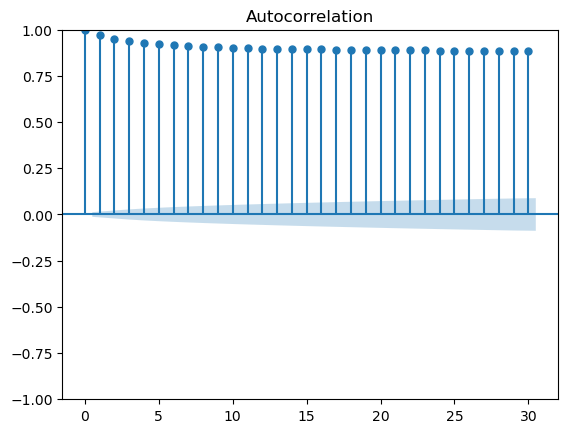

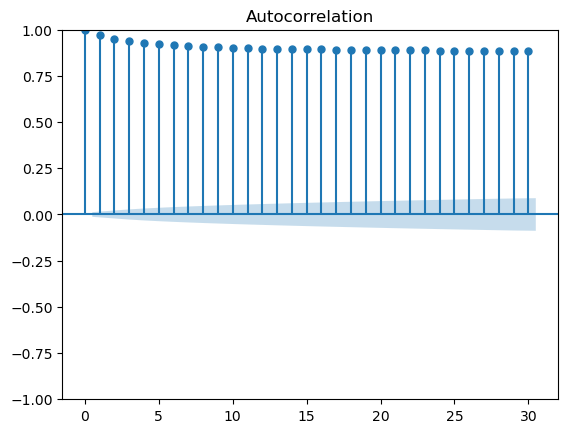

In [3]:
n_lags = 30
plot_acf(tape_price, lags=n_lags)

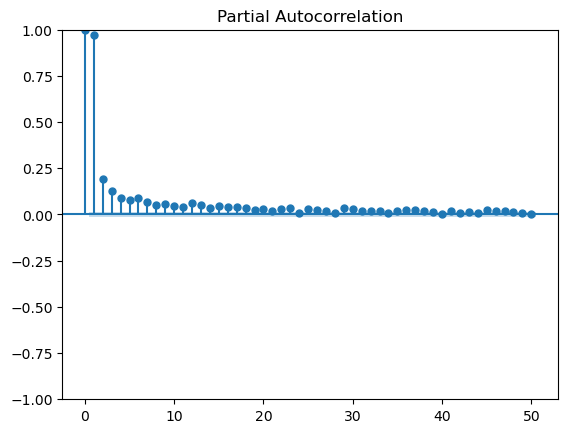

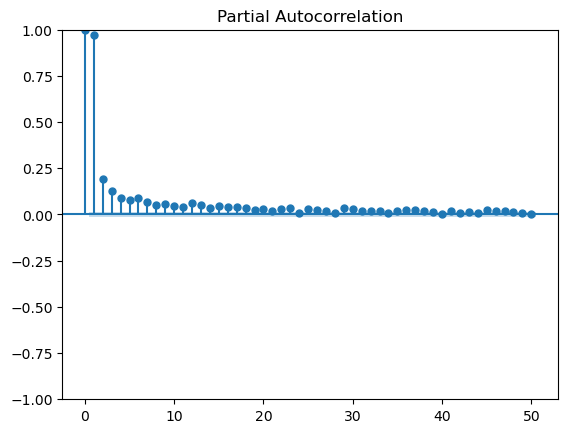

In [4]:
plot_pacf(tape_price, lags=n_lags + 20)

In [3]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

stepwise_fit = auto_arima(tape_price, trace=True, suppress_warnings=True)
stepwise_fit.summary()




Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=118718.690, Time=40.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=121910.501, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=120920.920, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=120557.223, Time=2.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=121908.502, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=118703.782, Time=15.94 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=120021.291, Time=4.45 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=118851.656, Time=9.12 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=118681.472, Time=20.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=119678.936, Time=5.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=118705.637, Time=18.49 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=118678.794, Time=37.36 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=119398.741, Time=6.27 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=118684.516, Time=26.71 sec

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                23810
Model:               SARIMAX(1, 1, 5)   Log Likelihood              -59330.833
Date:                Thu, 29 Feb 2024   AIC                         118675.667
Time:                        12:46:02   BIC                         118732.212
Sample:                             0   HQIC                        118694.012
                              - 23810                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8461      0.010     87.336      0.000       0.827       0.865
ma.L1         -1.1605      0.012   -100.501      0.000      -1.183      -1.138
ma.L2          0.1093      0.009     11.899      0.000       0.091       0.127
ma.L3          0.0353      0.009      3.823      0.000       0.017       0.053
ma.L4          0.0056      0.010      0.586      0.558      -0.013       0.024
ma.L5          0.0177      0.008      2.317      0.021       0.003       0.033
sigma2         8.5501      0.060    142.804      0.000       8.433       8.667
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5103.72
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.14
Prob(H) (two-sided):                  0.95   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
print(tape_price.shape)
train = tape_price.iloc[:-100]
test = tape_price.iloc[-100:]  # using the last 810 rows as the test
print(train.shape, test.shape)

(23810,)
(23710,) (100,)


In [17]:
model = ARIMA(train, order=(1, 1, 5))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                23710
Model:                 ARIMA(1, 1, 5)   Log Likelihood              -59085.508
Date:                Thu, 29 Feb 2024   AIC                         118185.016
Time:                        14:40:58   BIC                         118241.531
Sample:                             0   HQIC                        118203.354
                              - 23710                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8475      0.010     88.087      0.000       0.829       0.866
ma.L1         -1.1626      0.012   -100.954      0.000      -1.185      -1.140
ma.L2          0.1110      0.009     12.046      0.000       0.093       0.129
ma.L3          0.0353      0.009      3.820      0.000       0.017       0.053
ma.L4          0.0052      0.010      0.542      0.588      -0.014       0.024
ma.L5          0.0183      0.008      2.392      0.017       0.003       0.033
sigma2         8.5529      0.060    142.326      0.000       8.435       8.671
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5084.86
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.14
Prob(H) (two-sided):                  0.93   Kurtosis:                         5.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
start = len(train)
end = len(train) + len(test) - 1
prediction = model.predict(start=start, end=end)
# prediction.index = tape_price.index[start:end + 1]
print(prediction)

23710    291.544750
23711    291.677710
23712    291.662469
23713    291.655133
23714    291.565600
            ...    
23805    291.067900
23806    291.067900
23807    291.067900
23808    291.067900
23809    291.067900
Name: predicted_mean, Length: 100, dtype: float64


<Axes: >

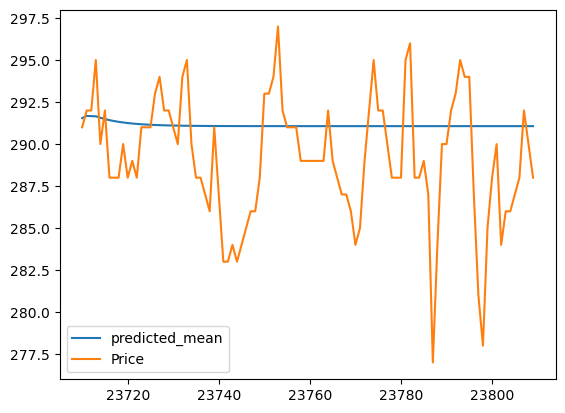

In [19]:
prediction.plot(legend=True)
test.plot(legend=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


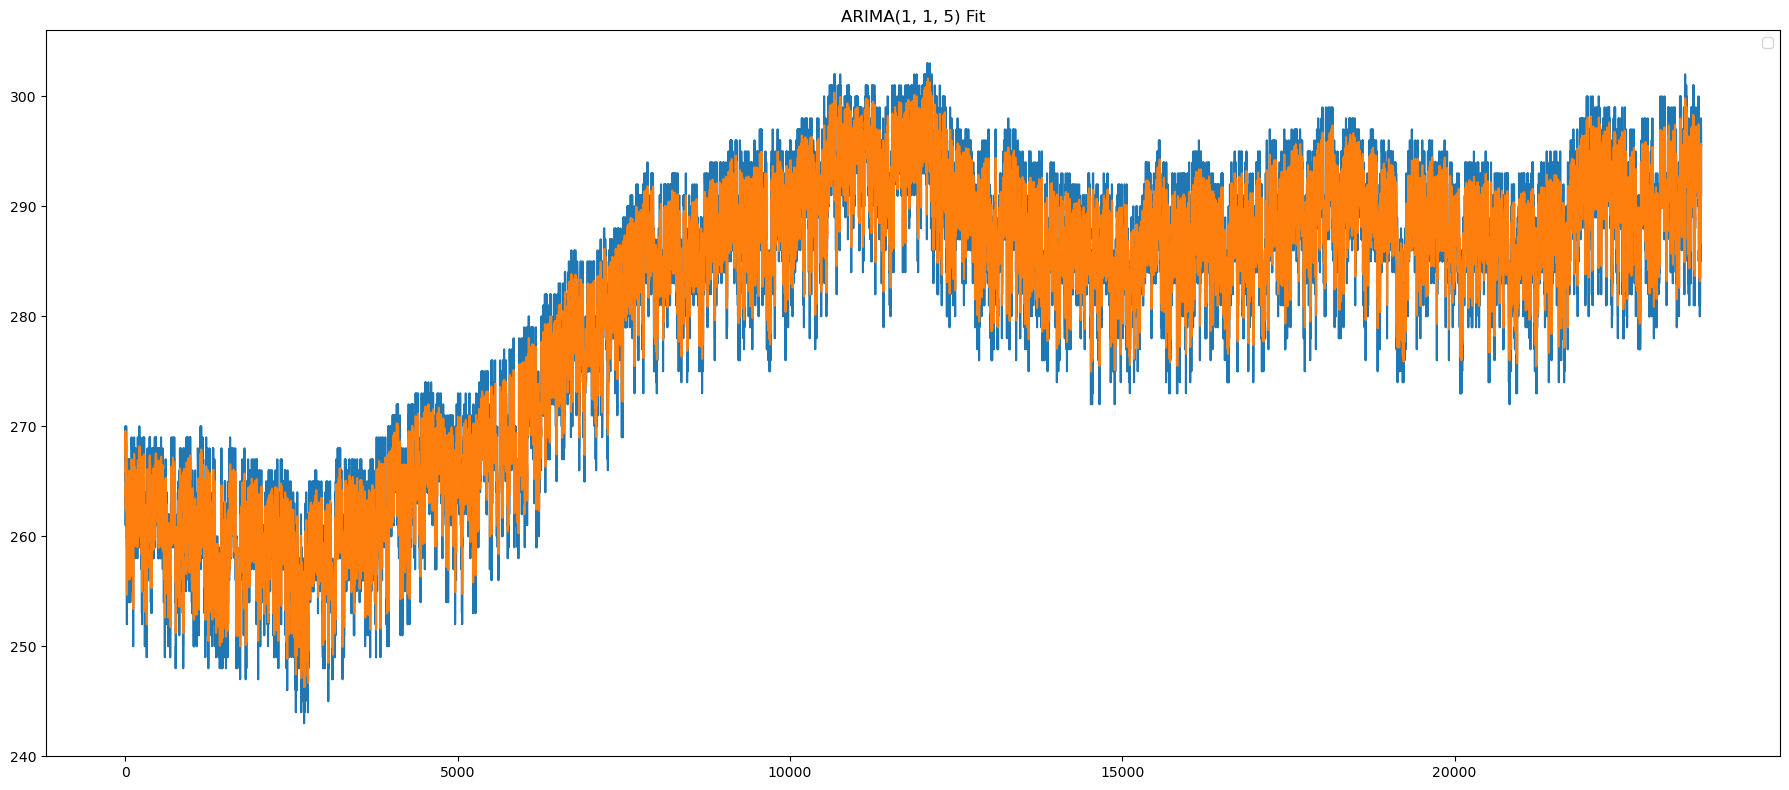

In [26]:
ar_try = [1]
ma_try = [5]  #parameter to try
fit_model = {}  #input model
AIC = {}  #input AIC(A measure of how well the model fits)
fig, axes = plt.subplots(len(ar_try), len(ma_try), figsize=(18, 8))
for idx, ar in enumerate(ar_try):
    for idy, ma in enumerate(ma_try):
        model = ARIMA(train, order=(ar, 1, ma))
        model_fit = model.fit()
        fit_model[ar, ma] = model_fit
        AIC[ar, ma] = fit_model[ar, ma].aic
        ax = axes 
        ax.set_title('ARIMA(1, 1, 5) Fit')
        ax.plot(train)
        ax.plot(model_fit.fittedvalues[1:])      
plt.tight_layout()